# CIFAR 100

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras 
from keras.layers import Dense

2022-07-27 14:07:20.301096: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Import Datasets

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 32, 32, 3)
$ y_train: (50000, 1)
$ x_test: (10000, 32, 32, 3)
$ y_test: (10000, 1)


## Image Show

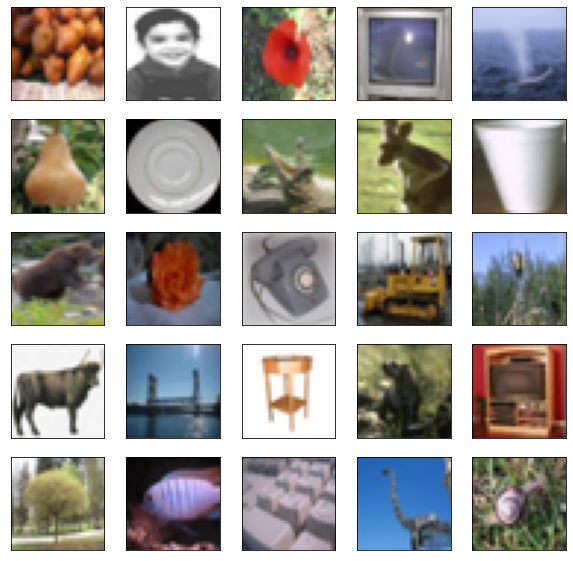

In [3]:
plt.figure(figsize=(10,10))
for idx, img in enumerate(np.random.randint(0, 9999, 25)):
    plt.subplot(5, 5, idx+1)
    plt.imshow(x_train[img])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Process Data

### Normalize Data

In [4]:
x_train, x_test = x_train/255, x_test/255

### Reshape Data

In [6]:
dim2 = 32*32*3
x_train = x_train.reshape(len(x_train), dim2)
x_test = x_test.reshape(len(x_test), dim2)

## Initialize Variables

### One-Hot Encoding

In [5]:
# One-hot Encoding
y_test = pd.get_dummies(i for i in y_test.T[0])
y_train = pd.get_dummies(i for i in y_train.T[0])
print(y_train[:5])

   0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   97  98  99  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 100 columns]


### Weight && Bias

In [8]:
W = np.full((3072, 1), 0.0)
b = np.full((100, 1), 0.0)

### Hyperparameter

In [9]:
learning_rate = 0.001
batch_size = 500 # 32 ~ 256
epochs = 100

## Build Model

In [10]:
model = keras.Sequential()

### Add Layers

In [11]:
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 3072)
$ y_train: (50000, 100)
$ x_test: (10000, 3072)
$ y_test: (10000, 100)


#### ReLU

In [12]:
model.add(Dense(1536, activation='relu', input_shape=(3072, )))
model.add(Dense(768, activation='relu', input_shape=(1536, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(256, activation='relu', input_shape=(512, )))
model.add(Dense(128, activation='relu', input_shape=(256, )))

#### Softmax

In [13]:
model.add(Dense(100, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1536)              4720128   
                                                                 
 dense_1 (Dense)             (None, 768)               1180416   
                                                                 
 dense_2 (Dense)             (None, 512)               393728    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               3

### Model Compile

In [15]:
adam = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Train

In [16]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
100/100 [==============================] - 31s 266ms/step - loss: 4.4625 - accuracy: 0.0244
Epoch 2/100
100/100 [==============================] - 28s 281ms/step - loss: 4.0575 - accuracy: 0.0667
Epoch 3/100
100/100 [==============================] - 27s 266ms/step - loss: 3.9362 - accuracy: 0.0857
Epoch 4/100
100/100 [==============================] - 27s 275ms/step - loss: 3.8614 - accuracy: 0.0974
Epoch 5/100
100/100 [==============================] - 27s 266ms/step - loss: 3.7502 - accuracy: 0.1175
Epoch 6/100
100/100 [==============================] - 27s 273ms/step - loss: 3.6302 - accuracy: 0.1392
Epoch 7/100
100/100 [==============================] - 28s 284ms/step - loss: 3.5403 - accuracy: 0.1569
Epoch 8/100
100/100 [==============================] - 28s 277ms/step - loss: 3.4665 - accuracy: 0.1696
Epoch 9/100
100/100 [==============================] - 28s 277ms/step - loss: 3.3973 - accuracy: 0.1797
Epoch 10/100
100/100 [==============================] - 29s 290m

## Predict

In [17]:
pred = model.predict(x_test)

313/313 [==============================] - 8s 23ms/step


## Test

In [58]:
count = 0

for idx, i in enumerate(pred):
    if np.argmax(y_test.T[idx]) == np.argmax(i):
        count += 1

In [59]:
# print(len(model.layers[0].get_weights()[0][1]))
# print(model.layers[0].get_weights()[1])
# # weights = model.layers[0].get_weights()[1]
# # weight_pic = weights.reshape(32, 32, 3)
print(count)

2010


In [20]:
len(pred)

10000

In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
